In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
pd.set_option('notebook_repr_html', True)

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
# figsize(15, 5)

import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")
pd.set_option('precision', 6)

Index(['Exports', 'Imports', 'Balance'], dtype='object')


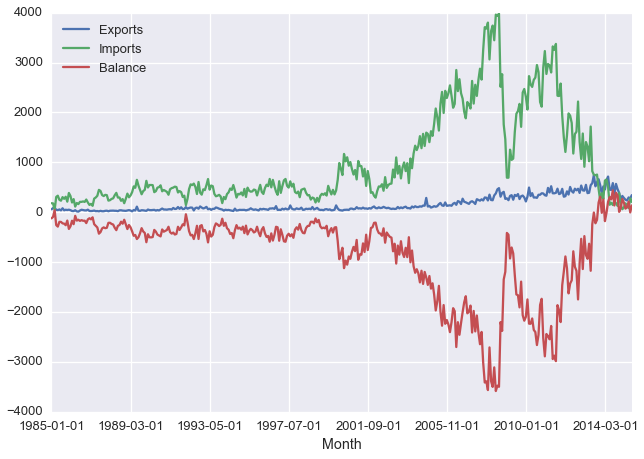

In [2]:
url_path = 'https://www.quandl.com/api/v3/datasets/USCENSUS/IE_7530.json?auth_token=W_c-rhUo457bjeN2xHgy'

r = requests.get(url_path)
new_data = r.json()



column_names = new_data['dataset']['column_names']
inp_dataset = new_data['dataset']['data']
dframe = pd.DataFrame(inp_dataset, columns=column_names)
dframe = dframe.set_index('Month')

print(dframe.columns)
dframe.sort_index(ascending=True, inplace=True)
dframe.plot(kind='line')


# dframe
# dframe.dtypes

## NASDAQ Dataset

Dataset:
http://www.nasdaq.com/quotes/nasdaq-100-stocks.aspx

Supporting article: 
https://realpython.com/blog/python/web-development-with-flask-fetching-data-with-requests/

Goal: Plot a Bubble plot for `10 top companies` in the list: `ebay`, `FB`, `GOOG`, `AAPL`, `YHOO`, `ADBE`, `TSLA` `SIRI`, `NFLX` and `EXPE`.

In [80]:

r = requests.get(URL)
data = r.text

results = {'children': []}
for line in csv.DictReader(data.splitlines(), skipinitialspace=True):
    results['children'].append({
            'name': line['Name'],
            'symbol': line['Symbol'],
            'price': line['lastsale'],
            'net_change': line['netchange'],
            'percent_change': line['pctchange'],
            'volume' : line['share_volume'],
            'value' : line['Nasdaq100_points']
        })

results;

In [126]:

iseries = pd.read_table('../_datasets_downloads/occupational_injuries/ii/ii.series')
iarea = pd.read_table('../_datasets_downloads/occupational_injuries/ii/ii.area')

print(iseries.shape)

iseries.head(2)



(260274, 11)


,series_id,supersector_code,industry_code,data_type_code,case_type_code,area_code,footnote_codes,begin_year,begin_period,end_year,end_period
0,IIU00000000001002,000,000000,0,1,2,,2003,A01,2007,A01
1,IIU00000000001004,000,000000,0,1,4,,2003,A01,2007,A01


In [88]:
print(iarea.shape)

iarea.head(2)

(169, 5)


,area_code,area_name,display_level,selectable,sort_sequence
0,2,"All ownerships, Alaska",0,T,2
1,4,"All ownerships, Arizona",0,T,7


In [108]:
isector = pd.read_table('../_datasets_downloads/occupational_injuries/ii/ii.supersector')
print(isector.shape)
isector.head()

(14, 5)


,supersector_code,supersector_name,display_level,selectable,sort_sequence
0,000,All,0,T,1
1,CON,Construction,0,T,4
2,EHS,Education and health services,0,T,11
3,FIA,Financial activities,0,T,9
4,GP1,Goods producing,0,T,2


In [139]:
jtables = pd.merge(pd.merge(iarea, iseries, on='area_code'), isector, on='supersector_code')

print(jtables.shape)

jtables.head(3)

(260274, 19)


,area_code,area_name,display_level_x,selectable_x,sort_sequence_x,series_id,supersector_code,industry_code,data_type_code,case_type_code,footnote_codes,begin_year,begin_period,end_year,end_period,supersector_name,display_level_y,selectable_y,sort_sequence_y
0,2,"All ownerships, Alaska",0,T,2,IIU00000000001002,000,000000,0,1,,2003,A01,2007,A01,All,0,T,1
1,2,"All ownerships, Alaska",0,T,2,IIU0000000000T002,000,000000,0,T,,2003,A01,2007,A01,All,0,T,1
2,2,"All ownerships, Alaska",0,T,2,IIU0000000000U002,000,000000,0,U,,2003,A01,2007,A01,All,0,T,1


In [137]:
# jtables = pd.merge(jtables, ft_notes, on='footnote_codes')

# print(jtables.shape)

# jtables.head(3)

datatypex = pd.read_table('../_datasets_downloads/occupational_injuries/ii/ii.data_type')
datatypex

,data_type_code,data_type_text
0,0,"Rate of illness cases per 10,000 full-time wor..."
1,1,Rate of injury cases per 100 full-time workers
2,3,Rate of injury and illness cases per 100 full-...
3,4,Number of illness cases (thousands)
4,5,Number of injury cases (thousands)
5,6,Number of injury and illness cases (thousands)


In [141]:
jtables = pd.merge(jtables, datatypex, on='data_type_code')

print(jtables.shape)

jtables.head(3)

(260274, 21)


,area_code,area_name,display_level_x,selectable_x,sort_sequence_x,series_id,supersector_code,industry_code,data_type_code,case_type_code,...,begin_year,begin_period,end_year,end_period,supersector_name,display_level_y,selectable_y,sort_sequence_y,data_type_text_x,data_type_text_y
0,2,"All ownerships, Alaska",0,T,2,IIU00000000001002,000,000000,0,1,...,2003,A01,2007,A01,All,0,T,1,"Rate of illness cases per 10,000 full-time wor...","Rate of illness cases per 10,000 full-time wor..."
1,2,"All ownerships, Alaska",0,T,2,IIU0000000000T002,000,000000,0,T,...,2003,A01,2007,A01,All,0,T,1,"Rate of illness cases per 10,000 full-time wor...","Rate of illness cases per 10,000 full-time wor..."
2,2,"All ownerships, Alaska",0,T,2,IIU0000000000U002,000,000000,0,U,...,2003,A01,2007,A01,All,0,T,1,"Rate of illness cases per 10,000 full-time wor...","Rate of illness cases per 10,000 full-time wor..."


In [146]:
case_type = pd.read_table('../_datasets_downloads/occupational_injuries/ii/ii.case_type')
print(case_type.shape)
case_type

(10, 2)


,case_type_code,case_type_text
0,1,Total recordable cases
1,2,"Cases involving days away from work, job restr..."
2,3,Cases involving days away from work
3,4,Cases involving days of job transfer or restri...
4,8,Other recordable cases
5,T,Total recordable cases of poisoning
6,U,Total recordable cases of skin disease
7,V,Total recordable cases of hearing loss
8,W,Total recordable cases of respiratory illnesses
9,Z,Total recordable cases of all other illnesses


In [148]:
jtables = pd.merge(jtables, case_type, on='case_type_code')

print(jtables.shape)


(260274, 22)


,area_code,area_name,display_level_x,selectable_x,sort_sequence_x,series_id,supersector_code,industry_code,data_type_code,case_type_code,...,begin_period,end_year,end_period,supersector_name,display_level_y,selectable_y,sort_sequence_y,data_type_text_x,data_type_text_y,case_type_text
0,2,"All ownerships, Alaska",0,T,2,IIU00000000001002,000,000000,0,1,...,A01,2007,A01,All,0,T,1,"Rate of illness cases per 10,000 full-time wor...","Rate of illness cases per 10,000 full-time wor...",Total recordable cases
1,4,"All ownerships, Arizona",0,T,7,IIU00000000001004,000,000000,0,1,...,A01,2007,A01,All,0,T,1,"Rate of illness cases per 10,000 full-time wor...","Rate of illness cases per 10,000 full-time wor...",Total recordable cases
2,6,"All ownerships, California",0,T,13,IIU00000000001006,000,000000,0,1,...,A01,2007,A01,All,0,T,1,"Rate of illness cases per 10,000 full-time wor...","Rate of illness cases per 10,000 full-time wor...",Total recordable cases


In [160]:
jtables.columns

Index(['area_code', 'area_name', 'display_level_x', 'selectable_x',
       'sort_sequence_x', 'series_id', 'supersector_code', 'industry_code',
       'data_type_code', 'case_type_code', 'footnote_codes', 'begin_year',
       'begin_period', 'end_year', 'end_period', 'supersector_name',
       'display_level_y', 'selectable_y', 'sort_sequence_y',
       'data_type_text_x', 'data_type_text_y', 'case_type_text'],
      dtype='object')

### Data Cleaning

In [175]:
# Check if both display_levels x and y are same then delete one and rename
bt = jtables.display_level_x == jtables.display_level_y
print(bt.unique())

# Check if both selectables are same
bt = jtables.selectable_x == jtables.selectable_y
print(bt.unique())


# Check if both data_type_text x and y are same
bt = jtables.data_type_text_x == jtables.data_type_text_y
print(bt.unique())


# Check if both sort_sequence x and y are same
bt = jtables.sort_sequence_x == jtables.sort_sequence_y
print(bt.unique())

[True]
[True]
[True]
[False True]


In [191]:
new_jtable = jtables.drop(['sort_sequence_y','data_type_text_y', 'selectable_y', 'display_level_y', 'footnote_codes' ], axis=1)

new_jtable.head()

,area_code,area_name,display_level_x,selectable_x,sort_sequence_x,series_id,supersector_code,industry_code,data_type_code,case_type_code,begin_year,begin_period,end_year,end_period,supersector_name,data_type_text_x,case_type_text
0,2,"All ownerships, Alaska",0,T,2,IIU00000000001002,000,000000,0,1,2003,A01,2007,A01,All,"Rate of illness cases per 10,000 full-time wor...",Total recordable cases
1,4,"All ownerships, Arizona",0,T,7,IIU00000000001004,000,000000,0,1,2003,A01,2007,A01,All,"Rate of illness cases per 10,000 full-time wor...",Total recordable cases
2,6,"All ownerships, California",0,T,13,IIU00000000001006,000,000000,0,1,2003,A01,2007,A01,All,"Rate of illness cases per 10,000 full-time wor...",Total recordable cases
3,9,"All ownerships, Connecticut",0,T,18,IIU00000000001009,000,000000,0,1,2003,A01,2007,A01,All,"Rate of illness cases per 10,000 full-time wor...",Total recordable cases
4,15,"All ownerships, Hawaii",0,T,31,IIU00000000001015,000,000000,0,1,2003,A01,2007,A01,All,"Rate of illness cases per 10,000 full-time wor...",Total recordable cases


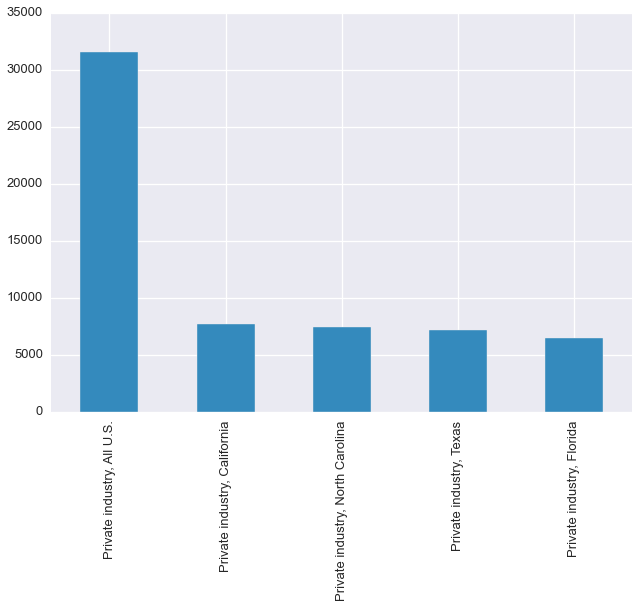

In [197]:
new_jtable.area_name.value_counts()[:5].plot(kind='bar')